In [1]:
#...for the JSON file managements.
import json

#...for the maps.
from mpl_toolkits.basemap import Basemap

#...for the MATH.
import numpy as np

#...for the plotting.
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Get the station information.

## The station latitudes.
lats = []

## The station longitudes.
lons = []

## The HiSPARC JSON file.
hisparc_json_file = open("./stations/json/hisparc.json", 'r')
hisparc_json = json.load(hisparc_json_file)
hisparc_json_file.close()

print("* Number of HiSPARC stations: %d" % (len(hisparc_json)))

for station_id, sd in hisparc_json.items():
    lats.append(sd['latitude'])
    lons.append(sd['longitude'])
    #break
    
## The QuarkNet JSON file.
qn_json_file = open("./stations/json/quarknet.json", 'r')
qn_json = json.load(qn_json_file)
qn_json_file.close()

print("* Number of QuarkNet stations: %d" % (len(qn_json)))

for station_id, sd in qn_json.items():
    lats.append(sd['latitude'])
    lons.append(sd['longitude'])
    #break

## The minimum latitude to plot.
min_lat = max(min(lats) - 5.0, -90.0)

## The maximum latitude to plot.
max_lat = min(max(lats) + 5.0,  90.0)

## The minimum longitude to plot.
min_lon = max(min(lons) - 5.0, -180.0)

## The maximum longitude to plot.
max_lon = min(max(lons) + 5.0,  180.0)

print("* Plotting between latitudes  [% 12.6f, % 12.6f]" % (min_lat, max_lat))
print("* Plotting between longitudes [% 12.6f, % 12.6f]" % (min_lon, max_lon))

* Number of HiSPARC stations: 126
* Number of QuarkNet stations: 377
* Plotting between latitudes  [  -38.499515,    64.866993]
* Plotting between longitudes [ -162.925968,   145.892186]


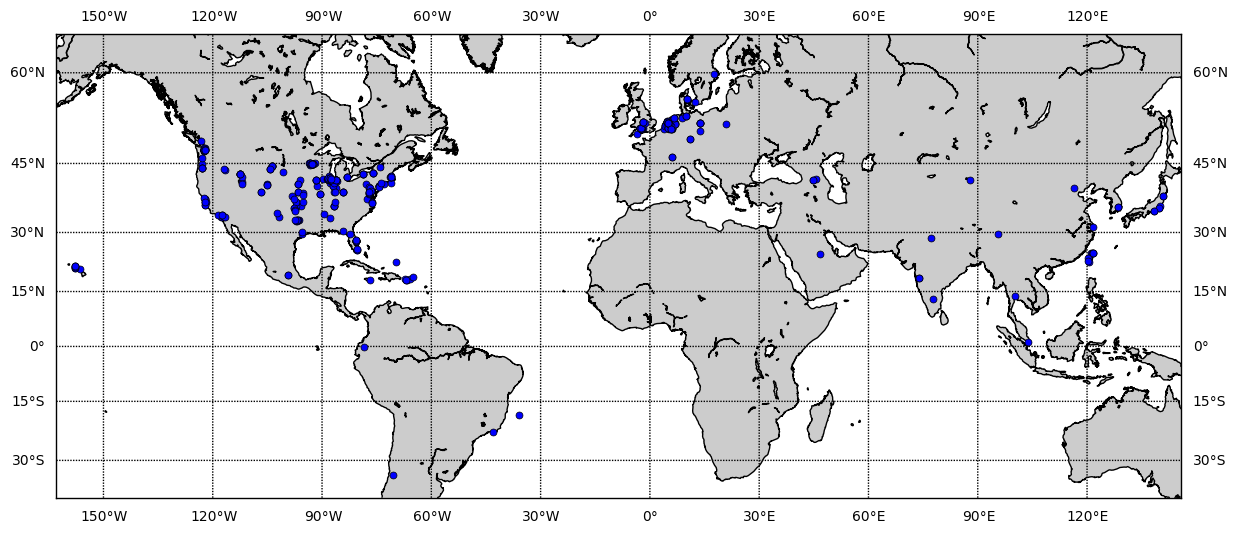

In [3]:
# Close all active figures (good practice).
plt.close('all')

## The thresholded image plot.
map_figure = plt.figure(101, figsize=(15.0, 10.0), dpi=150, facecolor='w', edgecolor='w')

# Adjust the position of the axes.
map_figure.subplots_adjust(bottom=0.17, left=0.15)

## The map axes.
map_ax = map_figure.add_subplot(111)

## The Basemap object for plotting the station positions.
m = Basemap(llcrnrlon=min_lon,llcrnrlat=min_lat,urcrnrlon=max_lon,urcrnrlat=max_lat,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)

# Draw the coastlines.
m.drawcoastlines()

# Fill in the continents.
m.fillcontinents()

# Draw the parallels.
m.drawparallels(np.arange(-90,90,15),labels=[1,1,1,1])

# Draw the meridians.
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,1,1])

# Create the map coordinates from the latitude and longitude lists.
x,y = m(lons, lats)

# Plot them!
m.plot(x, y, 'bo', markersize=5)